In [26]:
import pandas as pd

In [27]:
train_data = pd.read_csv('train_Vidya2.csv')

In [28]:
test_data = pd.read_csv('test_Vidya2.csv')

In [93]:
train_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,1967,3.0,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,C,8.0,8.0,10.0,9.0,380000,144400,7600000
1,P09411,Anna Nagar,1986,1995,1.0,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,10.0,9.0,5.0,8.0,760122,304049,21717770
2,P01812,Adyar,909,1992,2.0,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,9.0,8.0,5.0,7.0,421094,92114,13159200
3,P05346,Velachery,1855,1988,1.0,3.0,2.0,5,Family,No,...,NoSewr,Paved,C,10.0,8.0,8.0,9.0,356321,77042,9630290
4,P06210,Karapakkam,1226,1979,2.0,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,6.0,5.0,9.0,7.0,237000,74063,7406250


In [32]:
train_data['DATE_SALE'] = train_data['DATE_SALE'].apply(lambda x: int(str(x)[-4:]))
train_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [38]:
%matplotlib inline

In [39]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f30aad6a0>,
      dtype=object)

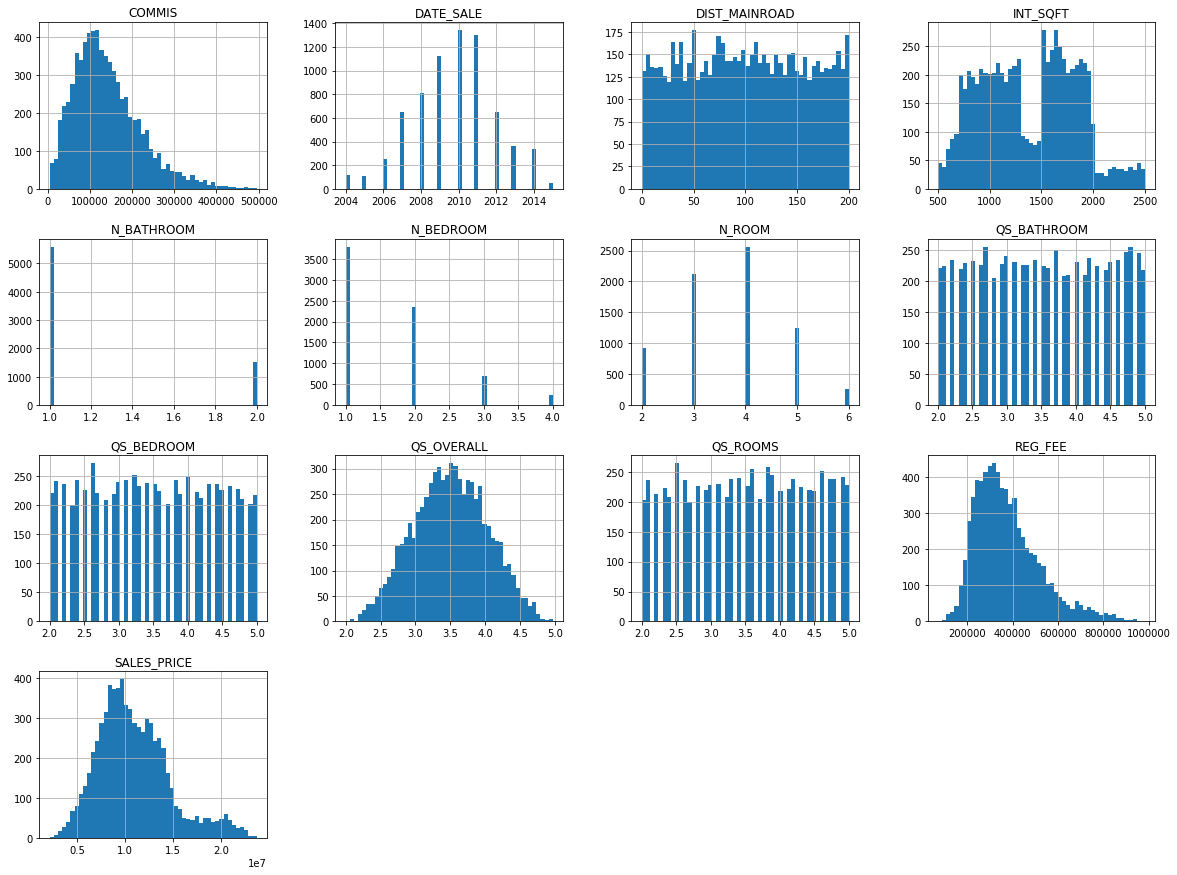

In [40]:
train_data.hist(bins=50,figsize=(20,15))

In [ ]:
y_train = train_data["SALES_PRICE"].copy()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer,StandardScaler

In [36]:
num_attribs = ["INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","REG_FEE","COMMIS","DATE_SALE"]
cat_attribs = ["AREA","SALE_COND","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE"]

In [10]:
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer',Imputer(strategy='median')),('std_scaler',StandardScaler())])

In [11]:
from sklearn.base import TransformerMixin,BaseEstimator
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [12]:
from sklearn.preprocessing import LabelBinarizer
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = self.encoder.fit_transform(X)
        else:
            result = self.encoder.transform(X)
        return result; 

In [13]:
cat_pipeline1 = Pipeline([('selector',DataFrameSelector(["AREA"])),('label_binarizer',LabelBinarizer_new())])
cat_pipeline2 = Pipeline([('selector',DataFrameSelector(["SALE_COND"])),('label_binarizer',LabelBinarizer_new())])
cat_pipeline3 = Pipeline([('selector',DataFrameSelector(["PARK_FACIL"])),('label_binarizer',LabelBinarizer_new())])
cat_pipeline4 = Pipeline([('selector',DataFrameSelector(["UTILITY_AVAIL"])),('label_binarizer',LabelBinarizer_new())])
cat_pipeline5 = Pipeline([('selector',DataFrameSelector(["STREET"])),('label_binarizer',LabelBinarizer_new())])
cat_pipeline6 = Pipeline([('selector',DataFrameSelector(["MZZONE"])),('label_binarizer',LabelBinarizer_new())])


In [14]:
from sklearn.pipeline import FeatureUnion

In [15]:
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline",num_pipeline),("cat_pipeline1",cat_pipeline1),("cat_pipeline2",cat_pipeline2),("cat_pipeline3",cat_pipeline3),("cat_pipeline4",cat_pipeline4),("cat_pipeline5",cat_pipeline5),("cat_pipeline6",cat_pipeline6)])

In [16]:
X_prepared = full_pipeline.fit_transform(train_data)

Initializing encoder
Initializing encoder
Initializing encoder
Initializing encoder
Initializing encoder
Initializing encoder


In [17]:
X_prepared.shape

(7109, 51)

In [33]:
tt = train_data.copy()
tt.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [92]:
train_data['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [34]:
train_data['AREA'].replace(to_replace="Adyr",value="Adyar",inplace=True)
train_data['AREA'].replace(to_replace="KKNagar",value="KK Nagar",inplace=True)
train_data['AREA'].replace(to_replace="Ann Nagar",value="Anna Nagar",inplace=True)
train_data['AREA'].replace(to_replace="Velchery",value="Velachery",inplace=True)
train_data['AREA'].replace(to_replace="Ana Nagar",value="Anna Nagar",inplace=True)
train_data['AREA'].replace(to_replace="Karapakam",value="Karapakkam",inplace=True)
train_data['AREA'].replace(to_replace="TNagar",value="T Nagar",inplace=True)
train_data['AREA'].replace(to_replace="Chormpet",value="Chrompet",inplace=True)
train_data['AREA'].replace(to_replace="Chrmpet",value="Chrompet",inplace=True)
train_data['AREA'].replace(to_replace="Chrompt",value="Chrompet",inplace=True)

In [41]:
train_data.describe()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,2009.768181,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,2.205979,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,2004.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,2008.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,2010.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,2011.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,2015.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [43]:
import numpy as np
train_data["DIST_MAINROAD"]=np.ceil(train_data["DIST_MAINROAD"]/50)

In [67]:
train_data['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C     1612
Name: MZZONE, dtype: int64

In [49]:
train_data['SALE_COND'].replace(to_replace="Adj Land",value="AdjLand",inplace=True)
train_data['SALE_COND'].replace(to_replace="Ab Normal",value="AbNormal",inplace=True)
train_data['SALE_COND'].replace(to_replace="Partiall",value="Partial",inplace=True)
train_data['SALE_COND'].replace(to_replace="PartiaLl",value="Partial",inplace=True)

In [52]:
train_data['PARK_FACIL'].replace(to_replace="Noo",value="No",inplace=True)

In [57]:
train_data['UTILITY_AVAIL'].replace(to_replace="All Pub",value="AllPub",inplace=True)

In [61]:
train_data['STREET'].replace(to_replace="Pavd",value="Paved",inplace=True)
train_data['STREET'].replace(to_replace="NoAccess",value="No Access",inplace=True)

In [66]:
train_data['MZZONE'].replace(to_replace="A",value="C",inplace=True)
train_data['MZZONE'].replace(to_replace="I",value="C",inplace=True)

In [71]:
train_data['DATE_BUILD'] = train_data['DATE_BUILD'].apply(lambda x: int(str(x)[-4:]))

In [78]:
train_data['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [77]:
train_data['BUILDTYPE'].replace(to_replace="Other",value="Others",inplace=True)
train_data['BUILDTYPE'].replace(to_replace="Comercial",value="Commercial",inplace=True)

In [80]:
train_data["QS_OVERALL"]=np.ceil(train_data["QS_OVERALL"]/0.5)

In [83]:
train_data["QS_BEDROOM"]=np.ceil(train_data["QS_BEDROOM"]/0.5)

In [86]:
train_data["QS_BATHROOM"]=np.ceil(train_data["QS_BATHROOM"]/0.5)

In [88]:
train_data["QS_ROOMS"]=np.ceil(train_data["QS_ROOMS"]/0.5)